# Imports

In [25]:
import h5py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Data exploration

In [2]:
from pyhdf.SD import SD, SDC

file_path = "./AIRS3STD v7.0/AIRS.2019.12.31.L3.RetStd_IR001.v7.0.4.0.G20309001711.hdf"
hdf = SD(file_path, SDC.READ)

# Print available datasets
print("Datasets:")
for dataset in hdf.datasets():
    print(f"- {dataset}, Shape: {hdf.select(dataset).info()[0]}")

# Print global attributes
print("\nGlobal Attributes:")
for attr in hdf.attributes():
    print(f"- {attr}: {hdf.attributes()[attr]}")


Datasets:
- TotalCounts_A, Shape: TotalCounts_A
- SurfPres_Forecast_A, Shape: SurfPres_Forecast_A
- SurfPres_Forecast_A_ct, Shape: SurfPres_Forecast_A_ct
- SurfPres_Forecast_A_sdev, Shape: SurfPres_Forecast_A_sdev
- SurfSkinTemp_A, Shape: SurfSkinTemp_A
- SurfSkinTemp_A_ct, Shape: SurfSkinTemp_A_ct
- SurfSkinTemp_A_sdev, Shape: SurfSkinTemp_A_sdev
- EmisIR_A, Shape: EmisIR_A
- EmisIR_A_ct, Shape: EmisIR_A_ct
- EmisIR_A_sdev, Shape: EmisIR_A_sdev
- Temperature_A, Shape: Temperature_A
- Temperature_A_ct, Shape: Temperature_A_ct
- Temperature_A_sdev, Shape: Temperature_A_sdev
- SurfAirTemp_A, Shape: SurfAirTemp_A
- SurfAirTemp_A_ct, Shape: SurfAirTemp_A_ct
- SurfAirTemp_A_sdev, Shape: SurfAirTemp_A_sdev
- TropPres_A, Shape: TropPres_A
- TropPres_A_ct, Shape: TropPres_A_ct
- TropPres_A_sdev, Shape: TropPres_A_sdev
- TropTemp_A, Shape: TropTemp_A
- TropTemp_A_ct, Shape: TropTemp_A_ct
- TropTemp_A_sdev, Shape: TropTemp_A_sdev
- TotH2OVap_A, Shape: TotH2OVap_A
- TotH2OVap_A_ct, Shape: TotH2OV

- StructMetadata.1: _FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_58
			OBJECT=DataField_59
				DataFieldName="CloudTopTemp_D"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_59
			OBJECT=DataField_60
				DataFieldName="CloudTopTemp_D_ct"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_60
			OBJECT=DataField_61
				DataFieldName="CloudTopTemp_D_sdev"
				DataType=DFNT_FLOAT32
				DimList=("YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_61
			OBJECT=DataField_62
				DataFieldName="FineCloudFrc_D"
				DataType=DFNT_FLOAT32
				DimList=("FineCloudLayer","YDim","XDim")
				CompressionType=HDFE_COMP_DEFLATE
				DeflateLevel=5
			END_OBJECT=DataField_62
			OBJECT=DataField_63
				DataFieldName="FineClou

- coremetadata.1: RET:007:AIRS.2020.01.01.066.L2.RetStd_IR.v7.0.4.0.G20308231921.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.067.L2.RetStd_IR.v7.0.4.0.G20308232327.hdf", "
          LGID:AIRS2RET:007:AIRS.2020.01.01.068.L2.RetStd_IR.v7.0.4.0.G20308232507.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.069.L2.RetStd_IR.v7.0.4.0.G20308232504.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.070.L2.RetStd_IR.v7.0.4.0.G20308232414.hdf", "
          LGID:AIRS2RET:007:AIRS.2020.01.01.071.L2.RetStd_IR.v7.0.4.0.G20308232418.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.072.L2.RetStd_IR.v7.0.4.0.G20308232232.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.073.L2.RetStd_IR.v7.0.4.0.G20308232628.hdf", "
          LGID:AIRS2RET:007:AIRS.2020.01.01.074.L2.RetStd_IR.v7.0.4.0.G20308233121.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.075.L2.RetStd_IR.v7.0.4.0.G20308233100.hdf", "LGID:AIRS2RET:007:AIRS.2020.01.01.076.L2.RetStd_IR.v7.0.4.0.G20308233123.hdf", "
          LGID:AIRS2RET:007:AIRS.2020.01.01.077.L2.RetStd_IR.v7.0.4.0.G2030823

In [26]:
from pyhdf.SD import SD, SDC

file_path = "./AIRS3STD v7.0/AIRS.2019.12.31.L3.RetStd_IR001.v7.0.4.0.G20309001711.hdf"
hdf = SD(file_path, SDC.READ)

# Extract Cloud Fraction for Ascending Orbit
cloud_fraction = hdf.select("CloudFrc_A")[:]

print("Cloud Fraction (Ascending):")
print(cloud_fraction)
print("Shape:", cloud_fraction.shape)


Cloud Fraction (Ascending):
[[-9.99900000e+03  8.20312500e-02 -9.99900000e+03 ...  8.20312500e-01
   3.67187500e-01 -9.99900000e+03]
 [ 3.39843750e-01  7.81250000e-01  6.21093750e-01 ...  1.23046875e-01
  -9.99900000e+03  2.23632812e-01]
 [ 2.06298828e-02  0.00000000e+00  3.76953125e-01 ...  6.91406250e-01
   4.19921875e-01  8.20312500e-01]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  9.86328125e-02]
 [ 0.00000000e+00  0.00000000e+00 -9.99900000e+03 ...  0.00000000e+00
   4.00390625e-01  0.00000000e+00]
 [ 0.00000000e+00 -9.99900000e+03 -9.99900000e+03 ... -9.99900000e+03
  -9.99900000e+03 -9.99900000e+03]]
Shape: (180, 360)


# Map

In [105]:
def plot_cf_map(cf_data):
    """Plots the ozone data on a global map."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)

    # Create the map
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("CF Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")
    ax.set_global()

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("CF Index")  # Adjust based on actual units

    plt.show()

In [106]:
def plot_cf_map_uruguay(cf_data):
    """Plots the ozone data, zoomed in on Uruguay."""
    # Handle missing values (replace -9999 or similar with NaN)
    cf_data = np.where(cf_data < 0, np.nan, cf_data)

    # Create latitude and longitude grids
    lons = np.linspace(-180, 180, cf_data.shape[1])  # Longitudes
    lats = np.linspace(90, -90, cf_data.shape[0])    # Latitudes
    lon_grid, lat_grid = np.meshgrid(lons, lats)
    
    # Create the map
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_title("UV Index", fontsize=14)

    # Add features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgray")

    # Zoom into Uruguay
    ax.set_extent([-58, -53, -35, -30], crs=ccrs.PlateCarree())

    # Plot the ozone data
    c = ax.pcolormesh(lon_grid, lat_grid, cf_data, shading="auto", cmap="Blues_r", transform=ccrs.PlateCarree())
    
    # Add a colorbar
    cb = plt.colorbar(c, orientation="horizontal", pad=0.05)
    cb.set_label("Index level")  # Adjust based on actual units
    
    # Add UV values as text labels
    for i in range(cf_data.shape[0]):
        for j in range(cf_data.shape[1]):
            lon, lat = lon_grid[i, j], lat_grid[i, j]
            if -58 <= lon <= -53 and -35 <= lat <= -30:  # Only label inside Uruguay's zoomed-in area
                if not np.isnan(cf_data[i, j]):  # Avoid NaN values
                    ax.text(lon, lat, f"{cf_data[i, j]:.2f}, {i}, {j}", fontsize=5,
                            ha="center", va="center", color="black",
                            transform=ccrs.PlateCarree())

    plt.show()

In [134]:
file_path = 'AIRS3STD v7.0\AIRS.2019.12.31.L3.RetStd_IR001.v7.0.4.0.G20309001711.hdf'

hdf = SD(file_path, SDC.READ)
cloud_fraction_a = hdf.select("CloudFrc_A")[:]
cloud_fraction_d = hdf.select("CloudFrc_D")[:]

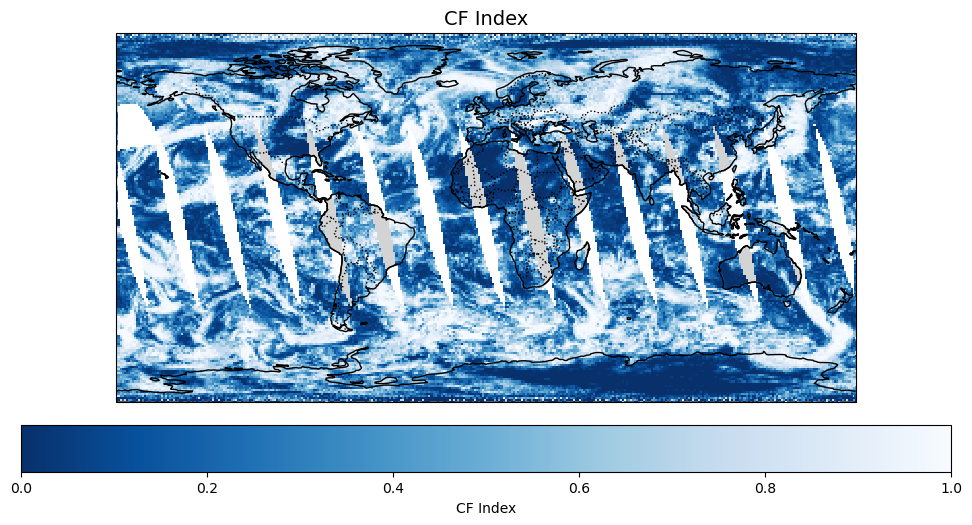

In [135]:
plot_cf_map(cloud_fraction_a)

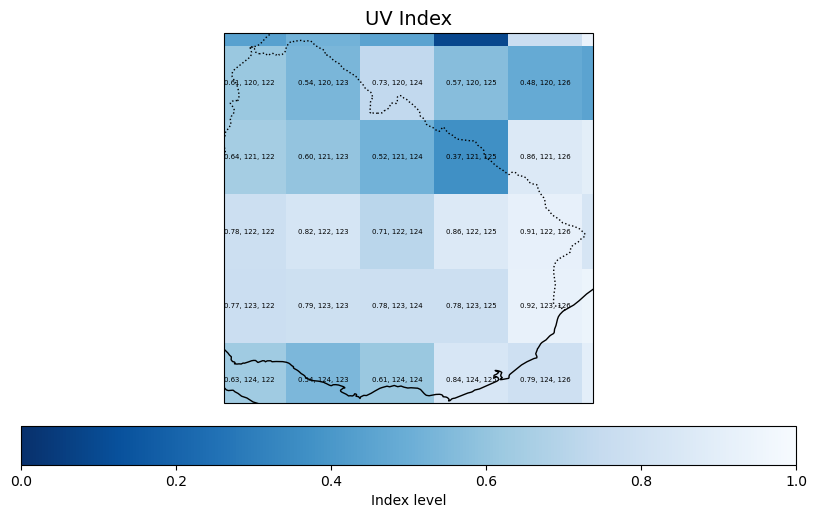

In [136]:
plot_cf_map_uruguay(cloud_fraction_a)

# Data Extract

In [152]:
def extract_uruguay_cf_from_file(file_path):
    
    hdf = SD(file_path, SDC.READ)
    
    # Extract Cloud Fraction for Ascending Orbit
    cloud_fraction_a = hdf.select("CloudFrc_A")[:]
    cloud_fraction_d = hdf.select("CloudFrc_D")[:]
    
    # Mask invalid values (-9999 to NaN)
    cloud_fraction_a = np.where(cloud_fraction_a < 0, np.nan, cloud_fraction_a)
    cloud_fraction_d = np.where(cloud_fraction_d < 0, np.nan, cloud_fraction_d)

    # Extract UV values using correct slicing
    uy_cloud_fraction_a = cloud_fraction_a[120:125,122:127]
    uy_cloud_fraction_d = cloud_fraction_d[120:125,122:127]
    
    return uy_cloud_fraction_a

In [153]:
uruguay_cf_data = {}
folder_path = "AIRS3STD v7.0"
for filename in os.listdir(folder_path):
    if filename.endswith(".hdf"):
        print(filename)
        file_path = os.path.join(folder_path, filename)
        
        uruguay_cf_data[filename] = extract_uruguay_cf_from_file(file_path)

AIRS.2019.12.31.L3.RetStd_IR001.v7.0.4.0.G20309001711.hdf
AIRS.2020.01.01.L3.RetStd_IR001.v7.0.4.0.G20309115208.hdf
AIRS.2020.01.02.L3.RetStd_IR001.v7.0.4.0.G20309125958.hdf
AIRS.2020.01.03.L3.RetStd_IR001.v7.0.4.0.G20309141343.hdf
AIRS.2020.01.04.L3.RetStd_IR001.v7.0.4.0.G20310163447.hdf
AIRS.2020.01.05.L3.RetStd_IR001.v7.0.4.0.G20310163445.hdf
AIRS.2020.01.06.L3.RetStd_IR001.v7.0.4.0.G20310163625.hdf
AIRS.2020.01.07.L3.RetStd_IR001.v7.0.4.0.G20310164534.hdf
AIRS.2020.01.08.L3.RetStd_IR001.v7.0.4.0.G20310163959.hdf
AIRS.2020.01.09.L3.RetStd_IR001.v7.0.4.0.G20310164137.hdf
AIRS.2020.01.10.L3.RetStd_IR001.v7.0.4.0.G20309220708.hdf
AIRS.2020.01.11.L3.RetStd_IR001.v7.0.4.0.G20309231656.hdf
AIRS.2020.01.12.L3.RetStd_IR001.v7.0.4.0.G20310001335.hdf
AIRS.2020.01.13.L3.RetStd_IR001.v7.0.4.0.G20310011826.hdf
AIRS.2020.01.14.L3.RetStd_IR001.v7.0.4.0.G20310022259.hdf
AIRS.2020.01.15.L3.RetStd_IR001.v7.0.4.0.G20310033404.hdf
AIRS.2020.01.16.L3.RetStd_IR001.v7.0.4.0.G20310043858.hdf
AIRS.2020.01.1

AIRS.2020.05.23.L3.RetStd_IR001.v7.0.4.0.G20325182335.hdf
AIRS.2020.05.24.L3.RetStd_IR001.v7.0.4.0.G20325193254.hdf
AIRS.2020.05.25.L3.RetStd_IR001.v7.0.4.0.G20325204847.hdf
AIRS.2020.05.26.L3.RetStd_IR001.v7.0.4.0.G20325215245.hdf
AIRS.2020.05.27.L3.RetStd_IR001.v7.0.4.0.G20325230255.hdf
AIRS.2020.05.28.L3.RetStd_IR001.v7.0.4.0.G20328102614.hdf
AIRS.2020.05.29.L3.RetStd_IR001.v7.0.4.0.G20328102617.hdf
AIRS.2020.05.30.L3.RetStd_IR001.v7.0.4.0.G20328102252.hdf
AIRS.2020.05.31.L3.RetStd_IR001.v7.0.4.0.G20328102250.hdf
AIRS.2020.06.01.L3.RetStd_IR001.v7.0.4.0.G20330123733.hdf
AIRS.2020.06.02.L3.RetStd_IR001.v7.0.4.0.G20330123725.hdf
AIRS.2020.06.03.L3.RetStd_IR001.v7.0.4.0.G20329145945.hdf
AIRS.2020.06.04.L3.RetStd_IR001.v7.0.4.0.G20329160254.hdf
AIRS.2020.06.05.L3.RetStd_IR001.v7.0.4.0.G20329171148.hdf
AIRS.2020.06.06.L3.RetStd_IR001.v7.0.4.0.G20329182132.hdf
AIRS.2020.06.07.L3.RetStd_IR001.v7.0.4.0.G20329193757.hdf
AIRS.2020.06.08.L3.RetStd_IR001.v7.0.4.0.G20329204110.hdf
AIRS.2020.06.0

AIRS.2020.10.29.L3.RetStd_IR001.v7.0.4.0.G20304223459.hdf
AIRS.2020.10.30.L3.RetStd_IR001.v7.0.4.0.G20305214343.hdf
AIRS.2020.10.31.L3.RetStd_IR001.v7.0.4.0.G20306201504.hdf
AIRS.2020.11.01.L3.RetStd_IR001.v7.0.4.0.G20307222157.hdf
AIRS.2020.11.02.L3.RetStd_IR001.v7.0.4.0.G20308205927.hdf
AIRS.2020.11.03.L3.RetStd_IR001.v7.0.4.0.G20310124911.hdf
AIRS.2020.11.04.L3.RetStd_IR001.v7.0.4.0.G20310224845.hdf
AIRS.2020.11.05.L3.RetStd_IR001.v7.0.4.0.G20311235518.hdf
AIRS.2020.11.06.L3.RetStd_IR001.v7.0.4.0.G20312195204.hdf
AIRS.2020.11.07.L3.RetStd_IR001.v7.0.4.0.G20313200211.hdf
AIRS.2020.11.08.L3.RetStd_IR001.v7.0.4.0.G20314210403.hdf
AIRS.2020.11.09.L3.RetStd_IR001.v7.0.4.0.G20315211646.hdf
AIRS.2020.11.10.L3.RetStd_IR001.v7.0.4.0.G20316210414.hdf
AIRS.2020.11.11.L3.RetStd_IR001.v7.0.4.0.G20317200651.hdf
AIRS.2020.11.12.L3.RetStd_IR001.v7.0.4.0.G20319005946.hdf
AIRS.2020.11.13.L3.RetStd_IR001.v7.0.4.0.G20320013411.hdf
AIRS.2020.11.14.L3.RetStd_IR001.v7.0.4.0.G20320203245.hdf
AIRS.2020.11.1

AIRS.2021.03.22.L3.RetStd_IR001.v7.0.4.0.G21083092545.hdf
AIRS.2021.03.23.L3.RetStd_IR001.v7.0.4.0.G21084012143.hdf
AIRS.2021.03.24.L3.RetStd_IR001.v7.0.4.0.G21085095532.hdf
AIRS.2021.03.25.L3.RetStd_IR001.v7.0.4.0.G21088184543.hdf
AIRS.2021.03.26.L3.RetStd_IR001.v7.0.4.0.G21086211222.hdf
AIRS.2021.03.27.L3.RetStd_IR001.v7.0.4.0.G21088215056.hdf
AIRS.2021.03.28.L3.RetStd_IR001.v7.0.4.0.G21088213002.hdf
AIRS.2021.03.29.L3.RetStd_IR001.v7.0.4.0.G21089212718.hdf
AIRS.2021.03.30.L3.RetStd_IR001.v7.0.4.0.G21090212823.hdf
AIRS.2021.03.31.L3.RetStd_IR001.v7.0.4.0.G21092013939.hdf
AIRS.2021.04.01.L3.RetStd_IR001.v7.0.4.0.G21093001632.hdf
AIRS.2021.04.02.L3.RetStd_IR001.v7.0.4.0.G21093214840.hdf
AIRS.2021.04.03.L3.RetStd_IR001.v7.0.4.0.G21094220532.hdf
AIRS.2021.04.04.L3.RetStd_IR001.v7.0.4.0.G21095214714.hdf
AIRS.2021.04.05.L3.RetStd_IR001.v7.0.4.0.G21096221926.hdf
AIRS.2021.04.06.L3.RetStd_IR001.v7.0.4.0.G21097213637.hdf
AIRS.2021.04.07.L3.RetStd_IR001.v7.0.4.0.G21098212856.hdf
AIRS.2021.04.0

AIRS.2021.08.13.L3.RetStd_IR001.v7.0.4.0.G21226213225.hdf
AIRS.2021.08.14.L3.RetStd_IR001.v7.0.4.0.G21227212329.hdf
AIRS.2021.08.15.L3.RetStd_IR001.v7.0.4.0.G21237133507.hdf
AIRS.2021.08.16.L3.RetStd_IR001.v7.0.4.0.G21237171141.hdf
AIRS.2021.08.17.L3.RetStd_IR001.v7.0.4.0.G21237134341.hdf
AIRS.2021.08.18.L3.RetStd_IR001.v7.0.4.0.G21232080545.hdf
AIRS.2021.08.19.L3.RetStd_IR001.v7.0.4.0.G21241222028.hdf
AIRS.2021.08.20.L3.RetStd_IR001.v7.0.4.0.G21241221944.hdf
AIRS.2021.08.21.L3.RetStd_IR001.v7.0.4.0.G21241222055.hdf
AIRS.2021.08.22.L3.RetStd_IR001.v7.0.4.0.G21236230337.hdf
AIRS.2021.08.23.L3.RetStd_IR001.v7.0.4.0.G21236230400.hdf
AIRS.2021.08.24.L3.RetStd_IR001.v7.0.4.0.G21238082730.hdf
AIRS.2021.08.25.L3.RetStd_IR001.v7.0.4.0.G21239085955.hdf
AIRS.2021.08.26.L3.RetStd_IR001.v7.0.4.0.G21241220036.hdf
AIRS.2021.08.27.L3.RetStd_IR001.v7.0.4.0.G21241221444.hdf
AIRS.2021.08.28.L3.RetStd_IR001.v7.0.4.0.G21243232805.hdf
AIRS.2021.08.29.L3.RetStd_IR001.v7.0.4.0.G21243230459.hdf
AIRS.2021.08.3

AIRS.2022.01.05.L3.RetStd_IR001.v7.0.7.0.G22136185141.hdf
AIRS.2022.01.06.L3.RetStd_IR001.v7.0.7.0.G22136200317.hdf
AIRS.2022.01.07.L3.RetStd_IR001.v7.0.7.0.G22136213603.hdf
AIRS.2022.01.08.L3.RetStd_IR001.v7.0.7.0.G22136224244.hdf
AIRS.2022.01.09.L3.RetStd_IR001.v7.0.7.0.G22136235700.hdf
AIRS.2022.01.10.L3.RetStd_IR001.v7.0.7.0.G22137165418.hdf
AIRS.2022.01.11.L3.RetStd_IR001.v7.0.7.0.G22137165618.hdf
AIRS.2022.01.12.L3.RetStd_IR001.v7.0.7.0.G22137165654.hdf
AIRS.2022.01.13.L3.RetStd_IR001.v7.0.7.0.G22137165708.hdf
AIRS.2022.01.14.L3.RetStd_IR001.v7.0.7.0.G22137053338.hdf
AIRS.2022.01.15.L3.RetStd_IR001.v7.0.7.0.G22137064502.hdf
AIRS.2022.01.16.L3.RetStd_IR001.v7.0.7.0.G22137080213.hdf
AIRS.2022.01.17.L3.RetStd_IR001.v7.0.7.0.G22137090823.hdf
AIRS.2022.01.18.L3.RetStd_IR001.v7.0.7.0.G22137102603.hdf
AIRS.2022.01.19.L3.RetStd_IR001.v7.0.7.0.G22137113640.hdf
AIRS.2022.01.20.L3.RetStd_IR001.v7.0.7.0.G22137124741.hdf
AIRS.2022.01.21.L3.RetStd_IR001.v7.0.7.0.G22137135734.hdf
AIRS.2022.01.2

AIRS.2022.06.08.L3.RetStd_IR001.v7.0.7.0.G22160202525.hdf
AIRS.2022.06.09.L3.RetStd_IR001.v7.0.7.0.G22161194006.hdf
AIRS.2022.06.10.L3.RetStd_IR001.v7.0.7.0.G22164121234.hdf
AIRS.2022.06.11.L3.RetStd_IR001.v7.0.7.0.G22164121024.hdf
AIRS.2022.06.12.L3.RetStd_IR001.v7.0.7.0.G22164180103.hdf
AIRS.2022.06.13.L3.RetStd_IR001.v7.0.7.0.G22165152953.hdf
AIRS.2022.06.14.L3.RetStd_IR001.v7.0.7.0.G22166164320.hdf
AIRS.2022.06.15.L3.RetStd_IR001.v7.0.7.0.G22167152301.hdf
AIRS.2022.06.16.L3.RetStd_IR001.v7.0.7.0.G22168154701.hdf
AIRS.2022.06.17.L3.RetStd_IR001.v7.0.7.0.G22169153336.hdf
AIRS.2022.06.18.L3.RetStd_IR001.v7.0.7.0.G22170152639.hdf
AIRS.2022.06.19.L3.RetStd_IR001.v7.0.7.0.G22171153341.hdf
AIRS.2022.06.20.L3.RetStd_IR001.v7.0.7.0.G22172154036.hdf
AIRS.2022.06.21.L3.RetStd_IR001.v7.0.7.0.G22173155749.hdf
AIRS.2022.06.22.L3.RetStd_IR001.v7.0.7.0.G22174153945.hdf
AIRS.2022.06.23.L3.RetStd_IR001.v7.0.7.0.G22175152427.hdf
AIRS.2022.06.24.L3.RetStd_IR001.v7.0.7.0.G22176151900.hdf
AIRS.2022.06.2

AIRS.2022.11.02.L3.RetStd_IR001.v7.0.7.0.G22308190310.hdf
AIRS.2022.11.03.L3.RetStd_IR001.v7.0.7.0.G22310164805.hdf
AIRS.2022.11.04.L3.RetStd_IR001.v7.0.7.0.G22310164508.hdf
AIRS.2022.11.05.L3.RetStd_IR001.v7.0.7.0.G22310165545.hdf
AIRS.2022.11.06.L3.RetStd_IR001.v7.0.7.0.G22311131026.hdf
AIRS.2022.11.07.L3.RetStd_IR001.v7.0.7.0.G22312131044.hdf
AIRS.2022.11.08.L3.RetStd_IR001.v7.0.7.0.G22313132152.hdf
AIRS.2022.11.09.L3.RetStd_IR001.v7.0.7.0.G22318183525.hdf
AIRS.2022.11.10.L3.RetStd_IR001.v7.0.7.0.G22318175828.hdf
AIRS.2022.11.11.L3.RetStd_IR001.v7.0.7.0.G22318203406.hdf
AIRS.2022.11.12.L3.RetStd_IR001.v7.0.7.0.G22318183800.hdf
AIRS.2022.11.13.L3.RetStd_IR001.v7.0.7.0.G22318191637.hdf
AIRS.2022.11.14.L3.RetStd_IR001.v7.0.7.0.G22319133558.hdf
AIRS.2022.11.15.L3.RetStd_IR001.v7.0.7.0.G22320155036.hdf
AIRS.2022.11.16.L3.RetStd_IR001.v7.0.7.0.G22321134523.hdf
AIRS.2022.11.17.L3.RetStd_IR001.v7.0.7.0.G22322133247.hdf
AIRS.2022.11.18.L3.RetStd_IR001.v7.0.7.0.G22323213317.hdf
AIRS.2022.11.1

AIRS.2023.03.27.L3.RetStd_IR001.v7.0.7.0.G23087225823.hdf
AIRS.2023.03.28.L3.RetStd_IR001.v7.0.7.0.G23088153322.hdf
AIRS.2023.03.29.L3.RetStd_IR001.v7.0.7.0.G23089175524.hdf
AIRS.2023.03.30.L3.RetStd_IR001.v7.0.7.0.G23093232455.hdf
AIRS.2023.03.31.L3.RetStd_IR001.v7.0.7.0.G23093232526.hdf
AIRS.2023.04.01.L3.RetStd_IR001.v7.0.7.0.G23094071746.hdf
AIRS.2023.04.02.L3.RetStd_IR001.v7.0.7.0.G23094071524.hdf
AIRS.2023.04.03.L3.RetStd_IR001.v7.0.7.0.G23094152100.hdf
AIRS.2023.04.04.L3.RetStd_IR001.v7.0.7.0.G23095153805.hdf
AIRS.2023.04.05.L3.RetStd_IR001.v7.0.7.0.G23096152217.hdf
AIRS.2023.04.06.L3.RetStd_IR001.v7.0.7.0.G23097152143.hdf
AIRS.2023.04.07.L3.RetStd_IR001.v7.0.7.0.G23098153042.hdf
AIRS.2023.04.08.L3.RetStd_IR001.v7.0.7.0.G23099151545.hdf
AIRS.2023.04.09.L3.RetStd_IR001.v7.0.7.0.G23100154401.hdf
AIRS.2023.04.10.L3.RetStd_IR001.v7.0.7.0.G23101152321.hdf
AIRS.2023.04.11.L3.RetStd_IR001.v7.0.7.0.G23102152943.hdf
AIRS.2023.04.12.L3.RetStd_IR001.v7.0.7.0.G23103170137.hdf
AIRS.2023.04.1

AIRS.2023.08.19.L3.RetStd_IR001.v7.0.7.0.G23232153711.hdf
AIRS.2023.08.20.L3.RetStd_IR001.v7.0.7.0.G23234080121.hdf
AIRS.2023.08.21.L3.RetStd_IR001.v7.0.7.0.G23234155354.hdf
AIRS.2023.08.22.L3.RetStd_IR001.v7.0.7.0.G23235153116.hdf
AIRS.2023.08.23.L3.RetStd_IR001.v7.0.7.0.G23236153542.hdf
AIRS.2023.08.24.L3.RetStd_IR001.v7.0.7.0.G23237202734.hdf
AIRS.2023.08.25.L3.RetStd_IR001.v7.0.7.0.G23240233334.hdf
AIRS.2023.08.26.L3.RetStd_IR001.v7.0.7.0.G23240232912.hdf
AIRS.2023.08.27.L3.RetStd_IR001.v7.0.7.0.G23241012539.hdf
AIRS.2023.08.28.L3.RetStd_IR001.v7.0.7.0.G23241202200.hdf
AIRS.2023.08.29.L3.RetStd_IR001.v7.0.7.0.G23242214945.hdf
AIRS.2023.08.30.L3.RetStd_IR001.v7.0.7.0.G23243154457.hdf
AIRS.2023.08.31.L3.RetStd_IR001.v7.0.7.0.G23244153344.hdf
AIRS.2023.09.01.L3.RetStd_IR001.v7.0.7.0.G23246160732.hdf
AIRS.2023.09.02.L3.RetStd_IR001.v7.0.7.0.G23246201843.hdf
AIRS.2023.09.03.L3.RetStd_IR001.v7.0.7.0.G23247154106.hdf
AIRS.2023.09.04.L3.RetStd_IR001.v7.0.7.0.G23252111219.hdf
AIRS.2023.09.0

AIRS.2024.01.10.L3.RetStd_IR001.v7.0.7.0.G24011184839.hdf
AIRS.2024.01.11.L3.RetStd_IR001.v7.0.7.0.G24012142531.hdf
AIRS.2024.01.12.L3.RetStd_IR001.v7.0.7.0.G24013202615.hdf
AIRS.2024.01.13.L3.RetStd_IR001.v7.0.7.0.G24014165747.hdf
AIRS.2024.01.14.L3.RetStd_IR001.v7.0.7.0.G24017001804.hdf
AIRS.2024.01.15.L3.RetStd_IR001.v7.0.7.0.G24021215821.hdf
AIRS.2024.01.16.L3.RetStd_IR001.v7.0.7.0.G24021215406.hdf
AIRS.2024.01.17.L3.RetStd_IR001.v7.0.7.0.G24021193222.hdf
AIRS.2024.01.18.L3.RetStd_IR001.v7.0.7.0.G24022205124.hdf
AIRS.2024.01.19.L3.RetStd_IR001.v7.0.7.0.G24022205217.hdf
AIRS.2024.01.20.L3.RetStd_IR001.v7.0.7.0.G24024191648.hdf
AIRS.2024.01.21.L3.RetStd_IR001.v7.0.7.0.G24024193839.hdf
AIRS.2024.01.22.L3.RetStd_IR001.v7.0.7.0.G24024215005.hdf
AIRS.2024.01.23.L3.RetStd_IR001.v7.0.7.0.G24029174105.hdf
AIRS.2024.01.24.L3.RetStd_IR001.v7.0.7.0.G24029174122.hdf
AIRS.2024.01.25.L3.RetStd_IR001.v7.0.7.0.G24029165126.hdf
AIRS.2024.01.26.L3.RetStd_IR001.v7.0.7.0.G24029174349.hdf
AIRS.2024.01.2

AIRS.2024.06.03.L3.RetStd_IR001.v7.0.7.0.G24157143509.hdf
AIRS.2024.06.04.L3.RetStd_IR001.v7.0.7.0.G24157173019.hdf
AIRS.2024.06.05.L3.RetStd_IR001.v7.0.7.0.G24158173406.hdf
AIRS.2024.06.06.L3.RetStd_IR001.v7.0.7.0.G24159154314.hdf
AIRS.2024.06.07.L3.RetStd_IR001.v7.0.7.0.G24160153756.hdf
AIRS.2024.06.08.L3.RetStd_IR001.v7.0.7.0.G24163161306.hdf
AIRS.2024.06.09.L3.RetStd_IR001.v7.0.7.0.G24163155429.hdf
AIRS.2024.06.10.L3.RetStd_IR001.v7.0.7.0.G24163154434.hdf
AIRS.2024.06.11.L3.RetStd_IR001.v7.0.7.0.G24164152903.hdf
AIRS.2024.06.12.L3.RetStd_IR001.v7.0.7.0.G24166124352.hdf
AIRS.2024.06.13.L3.RetStd_IR001.v7.0.7.0.G24166195944.hdf
AIRS.2024.06.14.L3.RetStd_IR001.v7.0.7.0.G24167151607.hdf
AIRS.2024.06.15.L3.RetStd_IR001.v7.0.7.0.G24168153456.hdf
AIRS.2024.06.16.L3.RetStd_IR001.v7.0.7.0.G24170085410.hdf
AIRS.2024.06.17.L3.RetStd_IR001.v7.0.7.0.G24172150025.hdf
AIRS.2024.06.18.L3.RetStd_IR001.v7.0.7.0.G24172223134.hdf
AIRS.2024.06.19.L3.RetStd_IR001.v7.0.7.0.G24172153326.hdf
AIRS.2024.06.2

AIRS.2024.10.29.L3.RetStd_IR001.v7.0.7.0.G24309192537.hdf
AIRS.2024.10.30.L3.RetStd_IR001.v7.0.7.0.G24309205048.hdf
AIRS.2024.10.31.L3.RetStd_IR001.v7.0.7.0.G24309180610.hdf
AIRS.2024.11.01.L3.RetStd_IR001.v7.0.7.0.G24311012211.hdf
AIRS.2024.11.02.L3.RetStd_IR001.v7.0.7.0.G24311011716.hdf
AIRS.2024.11.03.L3.RetStd_IR001.v7.0.7.0.G24311011717.hdf
AIRS.2024.11.04.L3.RetStd_IR001.v7.0.7.0.G24311012510.hdf
AIRS.2024.11.05.L3.RetStd_IR001.v7.0.7.0.G24313171437.hdf
AIRS.2024.11.06.L3.RetStd_IR001.v7.0.7.0.G24313193959.hdf
AIRS.2024.11.07.L3.RetStd_IR001.v7.0.7.0.G24317085657.hdf
AIRS.2024.11.08.L3.RetStd_IR001.v7.0.7.0.G24317085625.hdf
AIRS.2024.11.09.L3.RetStd_IR001.v7.0.7.0.G24317170100.hdf
AIRS.2024.11.10.L3.RetStd_IR001.v7.0.7.0.G24317193400.hdf
AIRS.2024.11.11.L3.RetStd_IR001.v7.0.7.0.G24318092819.hdf
AIRS.2024.11.12.L3.RetStd_IR001.v7.0.7.0.G24318204316.hdf
AIRS.2024.11.13.L3.RetStd_IR001.v7.0.7.0.G24323100643.hdf
AIRS.2024.11.14.L3.RetStd_IR001.v7.0.7.0.G24323175420.hdf
AIRS.2024.11.1

In [154]:
x = []
X = []

for value in uruguay_cf_data.keys():
    s_i = 59
    for i in range(uruguay_cf_data[value].shape[0]):
        s_j = 122
        for j in range(uruguay_cf_data[value].shape[1]):
            x = []
            x.append(value)
            x.append(f"{value[5:9]}-{value[10:12]}-{value[13:15]}")
            x.append(s_i)
            x.append(s_j)
            x.append(uruguay_cf_data[value][i,j])
            
            X.append(x)
            s_j = s_j + 1
        s_i = s_i - 1
        
X = np.asarray(X)

In [155]:
pd.DataFrame(X,columns = ['File_Name','Date','Latitude', 'Longitude', 'CF_Index']).to_excel('AIRS3STD v7.0.xlsx', index = False)